### Imports

In [2]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import *
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.util import bigrams
import langdetect as ld
LD_EXC = ld.lang_detect_exception.LangDetectException
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tovis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tovis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\tovis\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tovis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Läser in dataramen.

In [37]:
reviewsDF = pd.read_csv("./trustpilot.csv", sep=",")

reviewsDF['Brödtext'].replace('', np.nan, inplace=True)
reviewsDF = reviewsDF.dropna()
reviewsDF.head()

,Titel,Brödtext,Gradering,Plats,Datum,Webbsida
0,Efficient flight with pleasant crew.,Boarding seemed to run smoothly. Cabin crew we...,4,GB,2024-10-15,Trustpilot
1,Eazyjet = communication nulle en cas de pépin,Mon expérience avec EasyJet a été extrêmement ...,1,FR,2024-10-15,Trustpilot
2,Schlechter geht nicht !!!,Schlechter geht nicht !!!Flugstorno während de...,1,DE,2024-10-14,Trustpilot
3,Één hele grote oplichterij,Één hele grote oplichterij. De handbagage was ...,1,NL,2024-10-13,Trustpilot
4,Handgepäcksabzocke,Was für eine Abzocke. Am Gate wurde vor dem Be...,1,DE,2024-10-14,Trustpilot


In [38]:
reviewsDF.describe()

,Gradering
count,5537.000000
mean,1.371501
std,1.080471
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,5.000000


### Skapar ny kolumn 'Utlåtande'.

In [40]:
reviewsDF['Gradering'].value_counts()

Gradering
1    4856
5     374
2     140
4      87
3      80
Name: count, dtype: int64

In [41]:
pos_neg = []
for row in reviewsDF['Gradering']:
    if row >= 3:
        #positive
        pos_neg.append("Positiv")
    else:
        #negative
        pos_neg.append("Negativ")

In [42]:
reviewsDF.insert(6, "Utlåtande", pos_neg)

In [43]:
reviewsDF.head()

,Titel,Brödtext,Gradering,Plats,Datum,Webbsida,Utlåtande
0,Efficient flight with pleasant crew.,Boarding seemed to run smoothly. Cabin crew we...,4,GB,2024-10-15,Trustpilot,Positiv
1,Eazyjet = communication nulle en cas de pépin,Mon expérience avec EasyJet a été extrêmement ...,1,FR,2024-10-15,Trustpilot,Negativ
2,Schlechter geht nicht !!!,Schlechter geht nicht !!!Flugstorno während de...,1,DE,2024-10-14,Trustpilot,Negativ
3,Één hele grote oplichterij,Één hele grote oplichterij. De handbagage was ...,1,NL,2024-10-13,Trustpilot,Negativ
4,Handgepäcksabzocke,Was für eine Abzocke. Am Gate wurde vor dem Be...,1,DE,2024-10-14,Trustpilot,Negativ


### Graf av fördelning mellan positiva och negativa recensioner

In [45]:
dataPos = reviewsDF['Utlåtande'].value_counts()
dataPos

Utlåtande
Negativ    4996
Positiv     541
Name: count, dtype: int64

<Axes: >

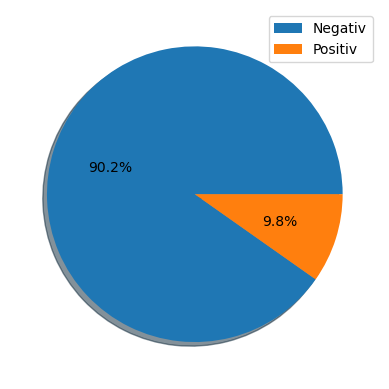

In [46]:
reviewsDF['Utlåtande'].value_counts().plot(
    kind="pie", legend="True", ylabel='', labeldistance=None, autopct='%1.1f%%', shadow=True)

### Graf av recensioner per land

In [48]:
dataCountry = reviewsDF['Plats'].value_counts()[reviewsDF['Plats'].value_counts() > 10]
dataCountry

Plats
GB    2656
FR     736
IT     574
NL     355
DE     323
CH     212
ES     148
DK     130
PT      53
US      48
SE      31
GR      27
IE      25
BE      22
AU      15
AT      13
CA      13
Name: count, dtype: int64

<Axes: xlabel='Country', ylabel='Reviews'>

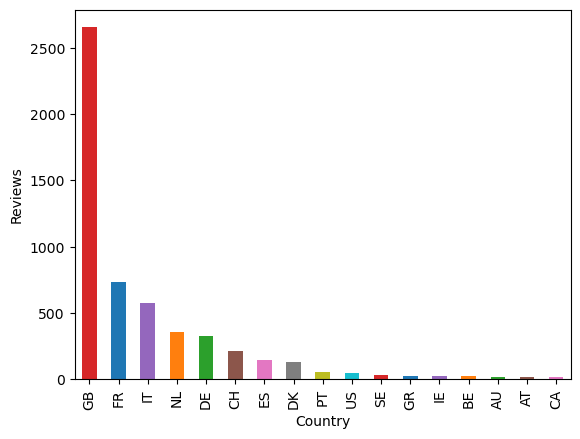

In [49]:
bar_colors = ['tab:red', 'tab:blue', 'tab:purple', 'tab:orange', 'tab:green', 'tab:brown'
             , 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
dataCountry.plot(kind="bar", color=bar_colors, xlabel="Country", ylabel="Reviews")

### Graf av medelvärdet för recensioner per land

In [51]:
#countriesDF = trustpilotDF.groupby("Plats").Gradering.mean()
placeholderDF = reviewsDF.groupby('Plats').filter(lambda x: len(x) > 10)
countriesDF = placeholderDF.groupby("Plats").Gradering.mean().sort_values(ascending=False)

In [52]:
countriesDF.head(20)

Plats
AU    1.533333
GB    1.505648
BE    1.409091
DE    1.362229
IE    1.360000
SE    1.290323
IT    1.285714
CH    1.250000
NL    1.222535
GR    1.222222
DK    1.215385
ES    1.209459
FR    1.183424
US    1.083333
AT    1.076923
PT    1.075472
CA    1.000000
Name: Gradering, dtype: float64

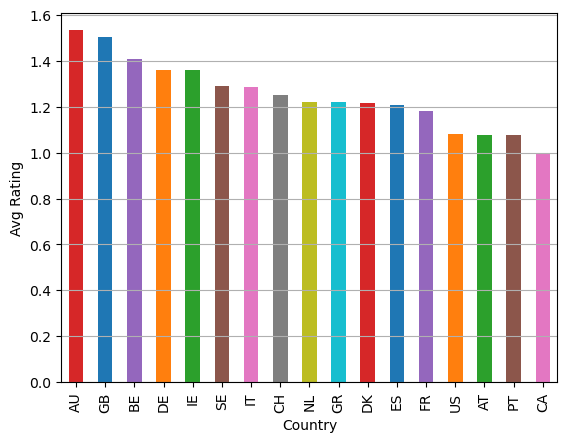

In [53]:
ax = countriesDF.plot(kind="bar", color=bar_colors, xlabel="Country", ylabel="Avg Rating")
ax.grid(visible=True, which='major', axis='y')

### Skapar en kolumn för engelska recensioner (True/False)

In [55]:
languages = []
for x in range(reviewsDF.size):
    try:
        language = ld.detect(reviewsDF['Brödtext'][x])
        languages.append(language)
    except LD_EXC:
        languages.append("error")
    except:
        pass

In [56]:
reviewsDF.insert(7, "Språk", languages)

In [57]:
reviewsDF['Språk'].value_counts()

Språk
en    3259
fr     748
it     555
de     429
nl     272
es     108
da      84
pt      32
sv      20
pl      13
no       4
af       4
ca       2
et       1
ro       1
sq       1
lt       1
el       1
hu       1
sw       1
Name: count, dtype: int64

In [58]:
reviewsDF.head(5)

,Titel,Brödtext,Gradering,Plats,Datum,Webbsida,Utlåtande,Språk
0,Efficient flight with pleasant crew.,Boarding seemed to run smoothly. Cabin crew we...,4,GB,2024-10-15,Trustpilot,Positiv,en
1,Eazyjet = communication nulle en cas de pépin,Mon expérience avec EasyJet a été extrêmement ...,1,FR,2024-10-15,Trustpilot,Negativ,fr
2,Schlechter geht nicht !!!,Schlechter geht nicht !!!Flugstorno während de...,1,DE,2024-10-14,Trustpilot,Negativ,de
3,Één hele grote oplichterij,Één hele grote oplichterij. De handbagage was ...,1,NL,2024-10-13,Trustpilot,Negativ,nl
4,Handgepäcksabzocke,Was für eine Abzocke. Am Gate wurde vor dem Be...,1,DE,2024-10-14,Trustpilot,Negativ,de


### Tokeniserar recensionerna

In [60]:
def review_filter(review):

    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', review)
    
    #Lowercase
    review = clean_text.lower()
    
    # tokenize
    word_tokens = word_tokenize(review)

    filtered_sentence = []

    stop_words = set(stopwords.words('english'))
    
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)

    #Lemmatize
    wl = WordNetLemmatizer()
    lemma_words = []
    for i in filtered_sentence:
      lemma_words.append(wl.lemmatize(i))
    
    return lemma_words

In [61]:
stopwords

<WordListCorpusReader in 'C:\\Users\\tovis\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>

In [62]:
tokenized = []
for x in range(reviewsDF.size):
    try:
        tokenized_review = review_filter(reviewsDF['Brödtext'][x])
        tokenized.append(tokenized_review)
    except KeyError:
        pass

In [63]:
reviewsDF.insert(8, "Tokeniserad", tokenized)

#### Skiljer mellan positiva och negativa engelska recensioner

In [65]:
ENGpos_DF = reviewsDF.loc[(reviewsDF["Språk"] == 'en') & (reviewsDF['Utlåtande'] == "Positiv")]
ENGneg_DF = reviewsDF.loc[(reviewsDF["Språk"] == 'en') & (reviewsDF['Utlåtande'] == "Negativ")]

### Skapar ett korpus för negativa och positiva recensioner

In [67]:
def create_corpus(df):
    corpus = []
    for i in range(df.shape[0]):
        try:
            corpus += df['Tokeniserad'][i]
        except KeyError:
            pass
    return corpus

In [68]:
corpusPOS = create_corpus(ENGpos_DF)
corpusNEG = create_corpus(ENGneg_DF)

In [69]:
mostCommon = Counter(corpusNEG).most_common(10)
mostCommon

[('flight', 2181),
 ('easyjet', 1579),
 ('customer', 748),
 ('time', 686),
 ('service', 658),
 ('bag', 640),
 ('u', 583),
 ('would', 573),
 ('get', 555),
 ('airport', 541)]

### Skapar bigrams

In [71]:
# Generate bigrams
bigram_listNEG = list(bigrams(corpusNEG))
bigram_listPOS = list(bigrams(corpusPOS))

In [72]:
bigram_listNEG

[('rent', 'car'),
 ('car', 'easyjet'),
 ('easyjet', 'full'),
 ('full', 'insurance'),
 ('insurance', 'trkiye'),
 ('trkiye', 'agency'),
 ('agency', 'insisting'),
 ('insisting', 'pay'),
 ('pay', 'full'),
 ('full', 'insurance'),
 ('insurance', 'cant'),
 ('cant', 'carand'),
 ('carand', 'suddenly'),
 ('suddenly', 'card'),
 ('card', 'machine'),
 ('machine', 'working'),
 ('working', 'depositsi'),
 ('depositsi', 'cancel'),
 ('cancel', 'everything'),
 ('everything', '9pm'),
 ('9pm', '2'),
 ('2', 'kid'),
 ('kid', 'small'),
 ('small', 'age'),
 ('age', 'look'),
 ('look', 'another'),
 ('another', 'option'),
 ('option', 'driving'),
 ('driving', 'couple'),
 ('couple', 'hoursafter'),
 ('hoursafter', 'complaining'),
 ('complaining', 'easyjet'),
 ('easyjet', 'answer'),
 ('answer', 'credit'),
 ('credit', 'card'),
 ('card', 'full'),
 ('full', 'name'),
 ('name', 'total'),
 ('total', 'scam'),
 ('scam', 'flight'),
 ('flight', 'cancelled'),
 ('cancelled', 'contact'),
 ('contact', 'available'),
 ('available', '

In [73]:
mostCommonBigramPOS = Counter(bigram_listPOS).most_common(10)
mostCommonBigramNEG = Counter(bigram_listNEG).most_common(10)

In [74]:
mostCommonBigramNEG

[(('customer', 'service'), 395),
 (('easy', 'jet'), 285),
 (('flight', 'cancelled'), 129),
 (('cabin', 'bag'), 120),
 (('flight', 'delayed'), 94),
 (('cancelled', 'flight'), 79),
 (('even', 'though'), 69),
 (('return', 'flight'), 69),
 (('2', 'hour'), 67),
 (('easyjet', 'holiday'), 65)]

### Visualisering av vanligaste bigrams i negativa och positiva recensioner

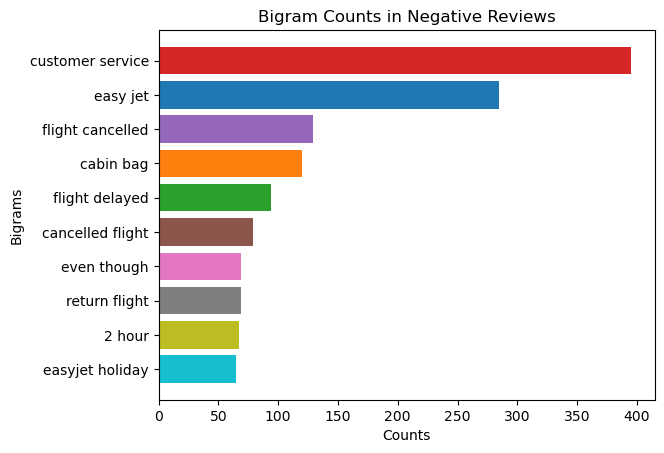

In [76]:
labels = []
values = []

for item in mostCommonBigramNEG:
    bigram, count = item
    labels.append(' '.join(bigram)) 
    values.append(count)

plt.barh(labels, values, color=bar_colors)

plt.gca().invert_yaxis()

plt.xlabel('Counts')
plt.ylabel('Bigrams')
plt.title('Bigram Counts in Negative Reviews')

plt.show()

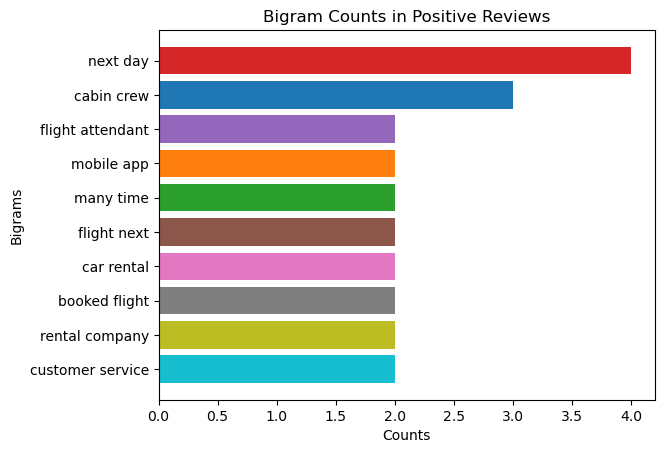

In [77]:
labels = []
values = []

for item in mostCommonBigramPOS:
    bigram, count = item
    labels.append(' '.join(bigram))
    values.append(count)

plt.barh(labels, values, color=bar_colors)

plt.gca().invert_yaxis()

plt.xlabel('Counts')
plt.ylabel('Bigrams')
plt.title('Bigram Counts in Positive Reviews')

plt.show()